In [ ]:
! pip install pyEDFlib

     |████████████████████████████████| 2.4 MB 4.3 MB/s 


In [ ]:
!nvidia-smi

Thu Mar 17 06:45:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pyedflib
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import warnings 
import random
import collections
from PIL import Image
from numpy.random import seed 

warnings.filterwarnings("ignore")

In [ ]:
from scipy.signal import butter, sosfilt, sosfreqz

**butter woth bandpass function**

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

**setting the frequency**

In [ ]:
lowcut = 0.5
highcut = 30
fs = 256

In [ ]:
pathDataSet = '/content/drive/MyDrive/chb_02/'
patients = ["02"]

In [ ]:
def loadSummaryPatient(index):
  f = open(pathDataSet+'chb'+patients[index]+'/chb'+patients[index]+'-summary.txt', 'r')
  parent = 'chb'+patients[index]+'/'
  return f, parent

**create the image dataset for time domain**

In [ ]:
def createDataset():

    print("START \n")
    for indexPatient in range(0, len(patients)):
        # fileList = []
    
        f, parent = loadSummaryPatient(indexPatient)
        line=f.readline()
        while (line):
            data=line.split(':')
            if (data[0]=="File Name"):
                name_F=data[1].strip()
                print(name_F)
                for i in range(3):
                    line=f.readline()
                for j in range(0, int(line.split(': ')[1])):
                    secSt=int(f.readline().split(': ')[1].split(' ')[0])
                    secEn=int(f.readline().split(': ')[1].split(' ')[0])
                    seizureImageGenerate(secSt, secEn, name_F, parent)

            line=f.readline()
        f.close()

    print("END \n")

**function to generate time images**

In [ ]:
def seizureImageGenerate(secSt, secEn, name_F, parent):
  file1 = pyedflib.EdfReader(pathDataSet+parent+name_F)
  n = file1.signals_in_file
  # print(n)
  signal_labels = file1.getSignalLabels()
  signal_headers = file1.getSignalHeaders()
  rate = signal_headers[0]['sample_rate']
  dur = file1.getFileDuration()
  x = np.zeros((n, file1.getNSamples()[0]))
  for i in range(n):
    x[i,:] = file1.readSignal(i)
    # print(x)
    label = file1.getLabel(i)
  file1.close()
  x_filter = butter_bandpass_filter(x ,lowcut , highcut , fs , order = 5)
  #a = os.getcwd()
  path = '/content/mix_images/'+ parent
  if os.path.isdir(path) is not True:
    os.makedirs(path)
  picnum = int(dur*rate/256)
  for i in range(picnum):
    img = x_filter[:,i*256:(i+1)*256]
    Img = Image.fromarray(np.uint8(img))
    if secSt <= i+1 <= secEn: #window size is 1sec
      filename = '_time_seizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')
    else:
      filename = '_time_nonseizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')

In [ ]:
createDataset()

START 

chb02_01.edf
chb02_02.edf
chb02_03.edf
chb02_04.edf
chb02_05.edf
chb02_06.edf
chb02_07.edf
chb02_08.edf
chb02_09.edf
chb02_10.edf
chb02_11.edf
chb02_12.edf
chb02_13.edf
chb02_14.edf
chb02_15.edf
chb02_16.edf
chb02_16+.edf
chb02_17.edf
chb02_18.edf
chb02_19.edf
chb02_20.edf
chb02_21.edf
chb02_22.edf
chb02_23.edf
chb02_24.edf
chb02_25.edf
chb02_26.edf
chb02_27.edf
chb02_28.edf
chb02_29.edf
chb02_30.edf
chb02_31.edf
chb02_32.edf
chb02_33.edf
chb02_34.edf
chb02_35.edf
END 



**function to generate frequency images**

In [ ]:
def seizureImageGenerate_freq(secSt, secEn, name_F, parent):
  file1 = pyedflib.EdfReader(pathDataSet+parent+name_F)
  n = file1.signals_in_file
  # print(n)
  signal_labels = file1.getSignalLabels()
  signal_headers = file1.getSignalHeaders()
  rate = signal_headers[0]['sample_rate']
  dur = file1.getFileDuration()
  x = np.zeros((n, file1.getNSamples()[0]))
  for i in range(n):
    x[i,:] = file1.readSignal(i)
    # print(x)
    label = file1.getLabel(i)
  file1.close()
  x_filter = butter_bandpass_filter(x ,lowcut , highcut , fs , order = 5)
  dft = np.fft.fft(x_filter, axis=1)
  #a = os.getcwd()
  path = '/content/mix_images/'+ parent
  if os.path.isdir(path) is not True:
    os.makedirs(path)
  picnum = int(dur*rate/256)
  for i in range(picnum):
    img = dft[:,i*256:(i+1)*256]
    Img = Image.fromarray(np.uint8(img))
    if secSt <= i+1 <= secEn: #window size of 1sec
      filename = '_freq_seizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')
    else:
      filename = '_freq_nonseizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')

**create the image dataset for frequency domain**

In [ ]:
def createDataset_freq():

    print("START \n")
    for indexPatient in range(0, len(patients)):
        # fileList = []
    
        f, parent = loadSummaryPatient(indexPatient)
        line=f.readline()
        while (line):
            data=line.split(':')
            if (data[0]=="File Name"):
                name_F=data[1].strip()
                print(name_F)
                for i in range(3):
                    line=f.readline()
                for j in range(0, int(line.split(': ')[1])):
                    secSt=int(f.readline().split(': ')[1].split(' ')[0])
                    secEn=int(f.readline().split(': ')[1].split(' ')[0])
                    seizureImageGenerate_freq(secSt, secEn, name_F, parent)

            line=f.readline()
        f.close()

    print("END \n")

In [ ]:
createDataset_freq()

START 

chb02_01.edf
chb02_02.edf
chb02_03.edf
chb02_04.edf
chb02_05.edf
chb02_06.edf
chb02_07.edf
chb02_08.edf
chb02_09.edf
chb02_10.edf
chb02_11.edf
chb02_12.edf
chb02_13.edf
chb02_14.edf
chb02_15.edf
chb02_16.edf
chb02_16+.edf
chb02_17.edf
chb02_18.edf
chb02_19.edf
chb02_20.edf
chb02_21.edf
chb02_22.edf
chb02_23.edf
chb02_24.edf
chb02_25.edf
chb02_26.edf
chb02_27.edf
chb02_28.edf
chb02_29.edf
chb02_30.edf
chb02_31.edf
chb02_32.edf
chb02_33.edf
chb02_34.edf
chb02_35.edf
END 



In [ ]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Flatten, LSTM, Bidirectional, ConvLSTM2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D, BatchNormalization, TimeDistributed, SimpleRNN, GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc, fbeta_score

**Data Loader**

In [ ]:
def generatePathList(patients, test_size):
    parent_path = '/content/mix_images/'
    pathList = []
    for indexPatient in range(0, len(patients)):
        sub_path = 'chb'+patients[indexPatient]+'/'
        directory_name = parent_path+sub_path
        for filename in os.listdir(directory_name):
            pathList.append(directory_name+filename)
    L = len(pathList)
    test_index = int(L*test_size)
    index = random.sample(range(L), L)
    return index[:test_index],index[test_index:],pathList

class DataGenerator(Sequence):

    def __init__(self, index, pathList, parent_path = '/content/mix_images/', batch_size=32):
        self.batch_size = batch_size
        self.parent_path = parent_path
        self.pathList = pathList
        self.index = index
        self.L = len(self.index)


    def __len__(self):
        return self.L - self.batch_size

    def __getitem__(self, idx):
        batch_indexs = self.index[idx:(idx+self.batch_size)]
        image_path = [self.pathList[k] for k in batch_indexs]
    
        return self._load_image(image_path)

  
    def _load_image(self, image_path):
        features = np.zeros(((len(image_path)),23,256))
        labels = np.zeros((len(image_path)),dtype=int)
        i = 0 #the feature index
        for name in image_path:
            #print(name)
            if '_seizure_' in name:
                features[i] = np.array(Image.open(name))[0:23,:]
                labels[i] = 1
            elif '_nonseizure_' in name:
                features[i] = np.array(Image.open(name))[0:23,:]
                labels[i] = 0
            i = i+1
        #print(features)
        #print(labels)
        #print(np.expand_dims(np.array(features), axis=3).shape)
        #print(labels.shape)
        return np.expand_dims(np.array(features), axis=3),labels

In [ ]:
model = Sequential()

model.add(Conv2D(64, (2, 4), input_shape=((23, 256, 1))))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.15))

model.add(Conv2D(32, (2, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.15))

model.add(Conv2D(32, (2, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.15))

model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(metrics=['accuracy',keras.metrics.Recall(name='sen')], 
              loss='binary_crossentropy', optimizer= 'sgd')

**Time Domain Images**

In [ ]:
test_id, train_id, path_list = generatePathList(patients,test_size=0.3) # 30% test_size 
train_data = DataGenerator(train_id, path_list)
test_data  =  DataGenerator(test_id, path_list)

In [ ]:
len(train_data)

5680

In [ ]:
len(test_data)

2415

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
history = model.fit(train_data, epochs= 10, verbose=1, callbacks=[early_stop], steps_per_epoch=None, 
                    validation_data=test_data, class_weight={0:1, 1:50}, workers=4, use_multiprocessing=True,
                    shuffle=False, initial_epoch=0)

Epoch 1/10
5680/5680 [==============================] - 194s 32ms/step - loss: 0.0796 - accuracy: 0.9866 - sen: 0.9911 - val_loss: 0.0278 - val_accuracy: 0.9910 - val_sen: 0.9636
Epoch 2/10
5680/5680 [==============================] - 178s 31ms/step - loss: 0.0311 - accuracy: 0.9960 - sen: 0.9961 - val_loss: 0.0215 - val_accuracy: 0.9942 - val_sen: 0.8909
Epoch 3/10
5680/5680 [==============================] - 185s 32ms/step - loss: 0.0180 - accuracy: 0.9973 - sen: 0.9977 - val_loss: 0.0161 - val_accuracy: 0.9954 - val_sen: 0.9636
Epoch 4/10
5680/5680 [==============================] - 179s 31ms/step - loss: 0.0184 - accuracy: 0.9970 - sen: 0.9979 - val_loss: 0.0181 - val_accuracy: 0.9950 - val_sen: 0.9636
Epoch 5/10
5680/5680 [==============================] - 178s 31ms/step - loss: 0.0103 - accuracy: 0.9983 - sen: 0.9979 - val_loss: 0.0144 - val_accuracy: 0.9967 - val_sen: 0.9455
Epoch 6/10
5680/5680 [==============================] - 178s 31ms/step - loss: 0.0059 - accuracy: 0.9989 

In [ ]:
model.save_weights('/content/drive/MyDrive/eeg_time_domain_image/model_weights_time_chb02.h5')
model.save('/content/drive/MyDrive/eeg_time_domain_image/model_keras_time_chb02.h5')

In [ ]:
model.evaluate(test_data, batch_size=32)

2415/2415 [==============================] - 39s 16ms/step - loss: 0.0196 - accuracy: 0.9963 - sen: 0.9455


[0.019609360024333, 0.9962732791900635, 0.9454545378684998]

In [ ]:
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)
y_val = []
for i in range(len(test_data)):
  list_val = list(test_data[i])
  y_val = np.hstack((y_val,list_val[1]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print('accuracy \t', accuracy_score(y_val, y_pred))
sensitivity = int(tp)/int(tp+fn)
print('sensitivity \t', sensitivity)
specificity = int(tn)/int(fp+tn)
print('specificity \t', specificity)
print('F1-score \t', f1_score(y_val, y_pred))

accuracy 	 0.9962732919254659
sensitivity 	 0.9454545454545454
specificity 	 0.997457627118644
F1-score 	 0.920353982300885


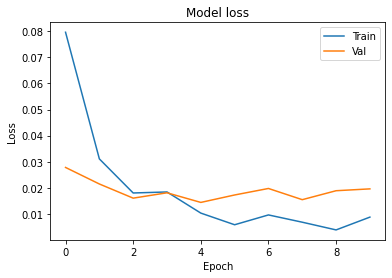

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

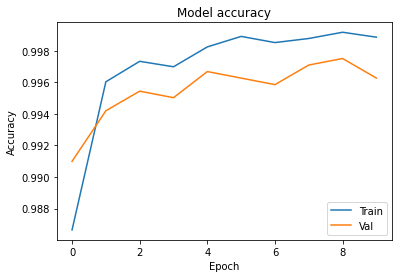

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Freq domain images**

In [ ]:
test_id, train_id, path_list = generatePathList(patients,test_size=0.3) # 30% test_size 
train_data = DataGenerator(train_id, path_list)
test_data  =  DataGenerator(test_id, path_list)

In [ ]:
len(train_data)

5680

In [ ]:
len(test_data)

2415

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
history = model.fit(train_data, epochs= 10, verbose=1, callbacks=[early_stop], steps_per_epoch=None, 
                    validation_data=test_data, class_weight={0:1, 1:50}, workers=4, use_multiprocessing=True,
                    shuffle=False, initial_epoch=0)

Epoch 1/10
5680/5680 [==============================] - 192s 34ms/step - loss: 0.3536 - accuracy: 0.9308 - sen: 0.9459 - val_loss: 0.1039 - val_accuracy: 0.9766 - val_sen: 0.0000e+00
Epoch 2/10
5680/5680 [==============================] - 194s 34ms/step - loss: 0.2114 - accuracy: 0.9729 - sen: 0.9553 - val_loss: 0.1646 - val_accuracy: 0.9417 - val_sen: 0.1061
Epoch 3/10
5680/5680 [==============================] - 186s 33ms/step - loss: 0.1369 - accuracy: 0.9815 - sen: 0.9726 - val_loss: 0.1056 - val_accuracy: 0.9720 - val_sen: 0.0177
Epoch 4/10
5680/5680 [==============================] - 190s 33ms/step - loss: 0.1016 - accuracy: 0.9858 - sen: 0.9782 - val_loss: 0.1110 - val_accuracy: 0.9694 - val_sen: 0.0884
Epoch 5/10
5680/5680 [==============================] - 186s 33ms/step - loss: 0.0811 - accuracy: 0.9878 - sen: 0.9833 - val_loss: 0.1161 - val_accuracy: 0.9711 - val_sen: 0.0708
Epoch 6/10
5680/5680 [==============================] - 189s 33ms/step - loss: 0.0639 - accuracy: 0.9

In [ ]:
model.save_weights('/content/drive/MyDrive/eeg_frequency_domain_image/model_weights_time_chb02.h5')
model.save('/content/drive/MyDrive/eeg_frequency_domain_image/model_keras_time_chb02.h5')

In [ ]:
model.evaluate(test_data, batch_size=32)

2415/2415 [==============================] - 43s 18ms/step - loss: 0.1514 - accuracy: 0.9731 - sen: 0.0708


[0.1514100879430771, 0.9731237292289734, 0.07075732201337814]

In [ ]:
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)
y_val = []
for i in range(len(test_data)):
  list_val = list(test_data[i])
  y_val = np.hstack((y_val,list_val[1]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print('accuracy \t', accuracy_score(y_val, y_pred))
sensitivity = int(tp)/int(tp+fn)
print('sensitivity \t', sensitivity)
specificity = int(tn)/int(fp+tn)
print('specificity \t', specificity)
print('F1-score \t', f1_score(y_val, y_pred))

accuracy 	 0.9731237060041408
sensitivity 	 0.07075732448866777
specificity 	 0.994752951464801
F1-score 	 0.10972996142306045


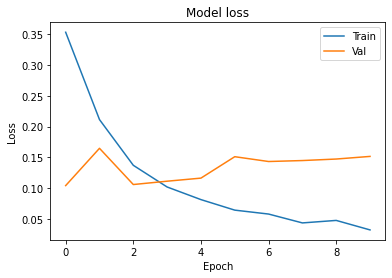

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

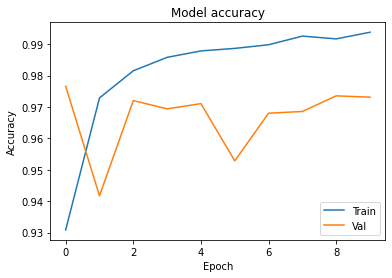

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**multi-view**

In [ ]:
test_id, train_id, path_list = generatePathList(patients,test_size=0.3) # 30% test_size 
train_data = DataGenerator(train_id, path_list)
test_data  =  DataGenerator(test_id, path_list)

In [ ]:
len(train_data)

11391

In [ ]:
len(test_data)

4863

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
history = model.fit(train_data, epochs= 10, verbose=1, callbacks=[early_stop], steps_per_epoch=None, 
                    validation_data=test_data, class_weight={0:1, 1:50}, workers=4, use_multiprocessing=True,
                    shuffle=False, initial_epoch=0)

Epoch 1/10
11391/11391 [==============================] - 232s 19ms/step - loss: 0.2478 - accuracy: 0.9531 - sen: 0.9676 - val_loss: 0.0876 - val_accuracy: 0.9817 - val_sen: 0.2250
Epoch 2/10
11391/11391 [==============================] - 219s 19ms/step - loss: 0.1924 - accuracy: 0.9688 - sen: 0.9669 - val_loss: 0.0792 - val_accuracy: 0.9829 - val_sen: 0.4109
Epoch 3/10
11391/11391 [==============================] - 216s 19ms/step - loss: 0.1357 - accuracy: 0.9806 - sen: 0.9760 - val_loss: 0.0696 - val_accuracy: 0.9812 - val_sen: 0.4304
Epoch 4/10
11391/11391 [==============================] - 219s 19ms/step - loss: 0.1003 - accuracy: 0.9856 - sen: 0.9828 - val_loss: 0.0710 - val_accuracy: 0.9808 - val_sen: 0.4402
Epoch 5/10
11391/11391 [==============================] - 217s 19ms/step - loss: 0.0879 - accuracy: 0.9874 - sen: 0.9847 - val_loss: 0.0789 - val_accuracy: 0.9788 - val_sen: 0.4304
Epoch 6/10
11391/11391 [==============================] - 217s 19ms/step - loss: 0.0645 - accur

In [ ]:
model.evaluate(test_data, batch_size=32)

4863/4863 [==============================] - 47s 10ms/step - loss: 0.0958 - accuracy: 0.9817 - sen: 0.4891


[0.09576421231031418, 0.9816535711288452, 0.48914703726768494]

In [ ]:
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)
y_val = []
for i in range(len(test_data)):
  list_val = list(test_data[i])
  y_val = np.hstack((y_val,list_val[1]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print('accuracy \t', accuracy_score(y_val, y_pred))
sensitivity = int(tp)/int(tp+fn)
print('sensitivity \t', sensitivity)
specificity = int(tn)/int(fp+tn)
print('specificity \t', specificity)
print('F1-score \t', f1_score(y_val, y_pred))

accuracy 	 0.9816535574748098
sensitivity 	 0.4891470498318557
specificity 	 0.9922281663329942
F1-score 	 0.528488852188274


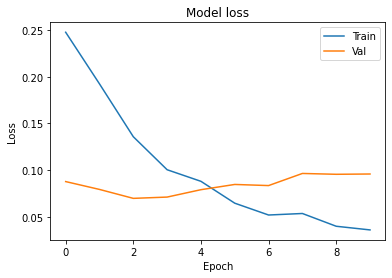

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

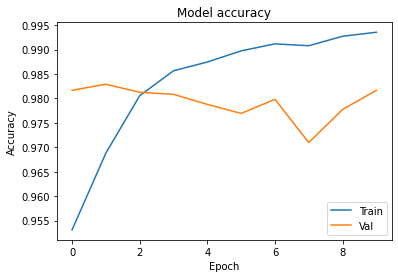

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()